In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
us_daily = pd.read_csv('data/Wheat Futures US Daily (2000-24).csv')
us_weekly = pd.read_csv('data/Wheat Futures US Weekly (2000-24).csv')
us_monthly = pd.read_csv('data/Wheat Futures US Monthly (2000-24).csv')

In [3]:
us_daily['Date'] = pd.to_datetime(us_daily['Date'], utc=True)
us_daily['Date'] = us_daily['Date'].dt.date
#us_daily['Date'] = us_daily['Date'].apply(lambda x: x.strftime('%d-%m-%Y'))
us_daily = us_daily.set_index('Date')

us_weekly['Date'] = pd.to_datetime(us_weekly['Date'], utc=True)
us_weekly['Date'] = us_weekly['Date'].dt.date
#us_weekly['Date'] = us_weekly['Date'].apply(lambda x: x.strftime('%d-%m-%Y'))
us_weekly = us_weekly.set_index('Date')

us_monthly['Date'] = pd.to_datetime(us_monthly['Date'], utc=True)
us_monthly['Date'] = us_monthly['Date'].dt.date
#us_monthly['Date'] = us_monthly['Date'].apply(lambda x: x.strftime('%d-%m-%Y'))
us_monthly = us_monthly.set_index('Date')

In [4]:
us_daily

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-09-21,296.00,296.00,292.00,293.75,4842,0.0,0.0
2000-09-22,293.50,297.00,293.25,295.50,3945,0.0,0.0
2000-09-25,297.50,300.00,297.00,299.50,5073,0.0,0.0
2000-09-26,301.00,303.50,299.75,302.00,9180,0.0,0.0
2000-09-27,301.50,308.00,301.00,307.75,11145,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-12,552.75,558.75,540.00,548.25,54543,0.0,0.0
2024-08-13,551.50,552.00,541.00,547.75,35884,0.0,0.0
2024-08-14,547.00,552.00,542.00,546.25,27390,0.0,0.0


In [5]:
us_daily.drop(columns=['Dividends','Stock Splits'], inplace = True)
us_weekly.drop(columns=['Dividends','Stock Splits'], inplace = True)
us_monthly.drop(columns=['Dividends','Stock Splits'], inplace = True)

In [6]:
dly_chng = [0]*len(us_daily.Close.values)
weekly_chng = [0]*len(us_weekly.Close.values)
monthly_chng = [0]*len(us_monthly.Close.values)

for i in range(1, len(us_daily.Close.values)):
    dly_chng[i] = round((us_daily.Close.values[i] - us_daily.Close.values[i-1])/us_daily.Close.values[i-1] * 100, 2)

for i in range(1, len(us_weekly.Close.values)):
    weekly_chng[i] = round((us_weekly.Close.values[i] - us_weekly.Close.values[i-1])/us_weekly.Close.values[i-1] * 100, 2)

for i in range(1, len(us_monthly.Close.values)):
    monthly_chng[i] = round((us_monthly.Close.values[i] - us_monthly.Close.values[i-1])/us_monthly.Close.values[i-1] * 100, 2)

In [7]:
us_weekly

,Open,High,Low,Close,Volume
Date,,,,,
2000-09-18,296.00,297.00,292.00,295.50,8787
2000-09-25,297.50,320.00,297.00,320.00,46542
2000-10-02,325.00,325.00,313.00,318.50,29898
2000-10-09,317.50,331.50,316.50,320.00,39789
2000-10-16,319.50,324.50,308.25,309.00,36577
...,...,...,...,...,...
2024-07-15,569.00,579.50,545.75,570.00,130663
2024-07-22,570.25,578.25,544.50,545.50,114891
2024-07-29,546.00,562.75,535.50,559.75,2302464


In [8]:
us_daily['Daily Change (%)'] = dly_chng
us_weekly['Weekly Change (%)'] = weekly_chng
us_monthly['Monthly Change (%)'] = monthly_chng


In [9]:
us_daily['Daily Change (%) Squared'] = np.square(us_daily['Daily Change (%)'].values)
us_weekly['Weekly Change (%) Squared'] = np.square(us_weekly['Weekly Change (%)'].values)
us_monthly['Monthly Change (%) Squared'] = np.square(us_monthly['Monthly Change (%)'].values)

In [10]:
us_daily.head()

,Open,High,Low,Close,Volume,Daily Change (%),Daily Change (%) Squared
Date,,,,,,,
2000-09-21,296.0,296.0,292.00,293.75,4842,0.00,0.0000
2000-09-22,293.5,297.0,293.25,295.50,3945,0.60,0.3600
2000-09-25,297.5,300.0,297.00,299.50,5073,1.35,1.8225
2000-09-26,301.0,303.5,299.75,302.00,9180,0.83,0.6889
2000-09-27,301.5,308.0,301.00,307.75,11145,1.90,3.6100


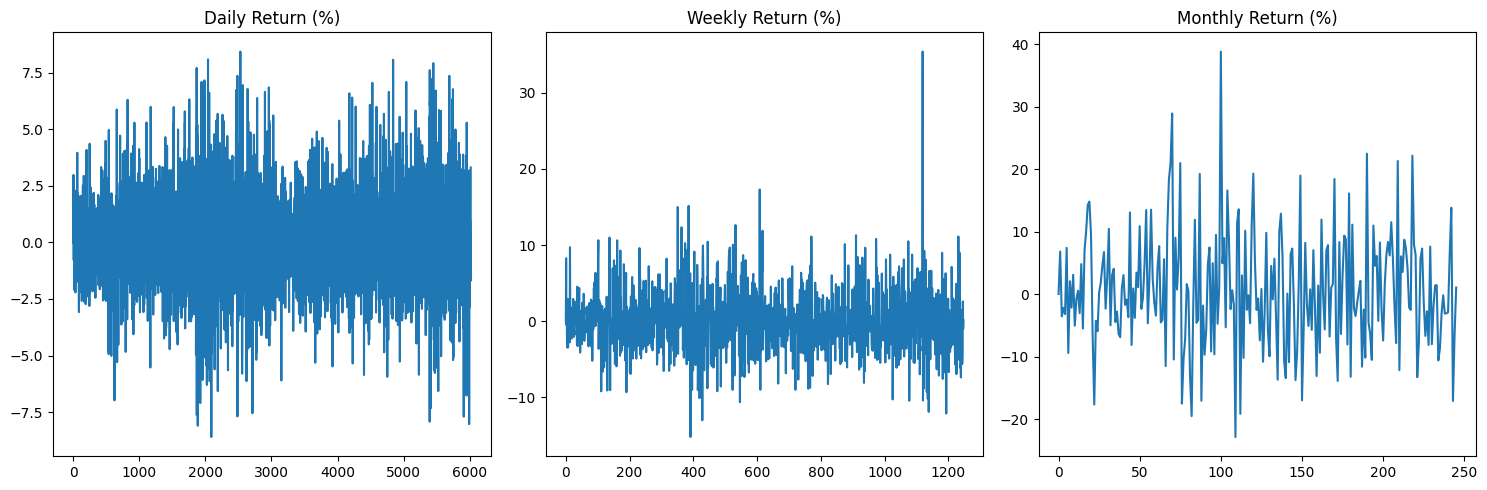

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot in the first subplot
axs[0].plot(us_daily['Daily Change (%)'].values)
axs[0].set_title('Daily Return (%)')

# Plot in the second subplot
axs[1].plot(us_weekly['Weekly Change (%)'].values)
axs[1].set_title('Weekly Return (%)')

# Plot in the third subplot
axs[2].plot(us_monthly['Monthly Change (%)'].values)
axs[2].set_title('Monthly Return (%)')

# Display the plots
plt.tight_layout()
plt.show()

C:\Users\X Warrior\AppData\Local\Temp\ipykernel_3040\1811907243.py:4: RuntimeWarning: divide by zero encountered in log
  axs[0].plot(np.log(us_daily['Daily Change (%)'].values))
C:\Users\X Warrior\AppData\Local\Temp\ipykernel_3040\1811907243.py:4: RuntimeWarning: invalid value encountered in log
  axs[0].plot(np.log(us_daily['Daily Change (%)'].values))
C:\Users\X Warrior\AppData\Local\Temp\ipykernel_3040\1811907243.py:8: RuntimeWarning: divide by zero encountered in log
  axs[1].plot(np.log(us_weekly['Weekly Change (%)'].values))
C:\Users\X Warrior\AppData\Local\Temp\ipykernel_3040\1811907243.py:8: RuntimeWarning: invalid value encountered in log
  axs[1].plot(np.log(us_weekly['Weekly Change (%)'].values))
C:\Users\X Warrior\AppData\Local\Temp\ipykernel_3040\1811907243.py:12: RuntimeWarning: divide by zero encountered in log
  axs[2].plot(np.log(us_monthly['Monthly Change (%)'].values))
C:\Users\X Warrior\AppData\Local\Temp\ipykernel_3040\1811907243.py:12: RuntimeWarning: invalid val

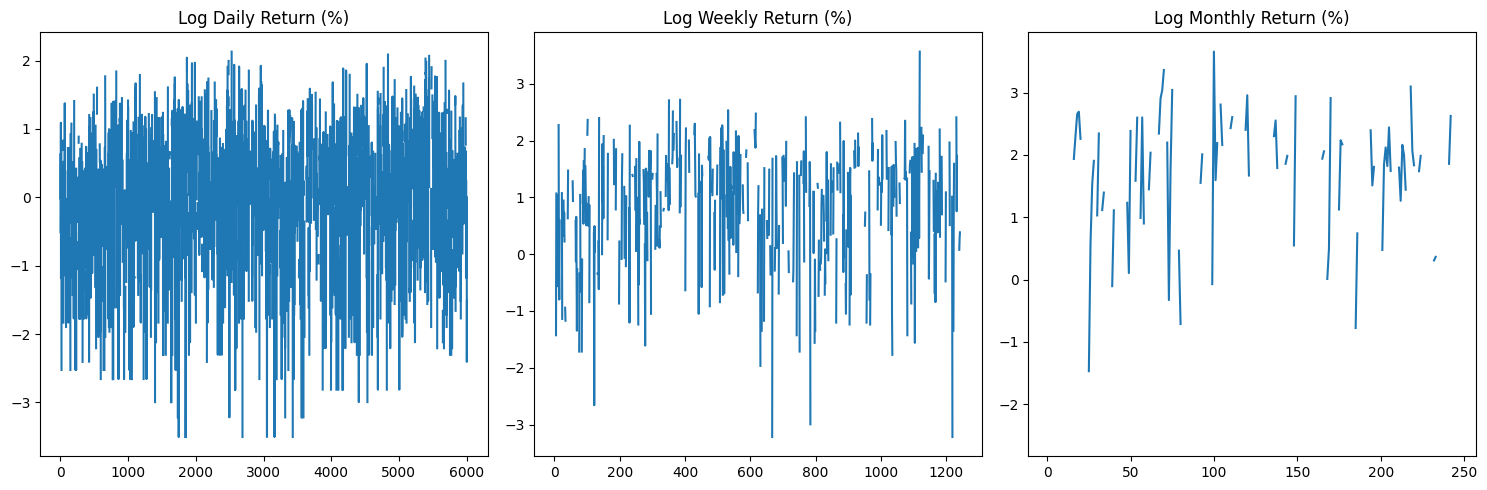

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot in the first subplot
axs[0].plot(np.log(us_daily['Daily Change (%)'].values))
axs[0].set_title('Log Daily Return (%)')

# Plot in the second subplot
axs[1].plot(np.log(us_weekly['Weekly Change (%)'].values))
axs[1].set_title('Log Weekly Return (%)')

# Plot in the third subplot
axs[2].plot(np.log(us_monthly['Monthly Change (%)'].values))
axs[2].set_title('Log Monthly Return (%)')

# Display the plots
plt.tight_layout()
plt.show()

In [13]:
us_daily.to_csv('data/US_daily_return.csv')
us_weekly.to_csv('data/US_weekly_return.csv')
us_monthly.to_csv('data/US_monthly_return.csv')

### Auto Correlation

In [15]:
no_of_lags = 40

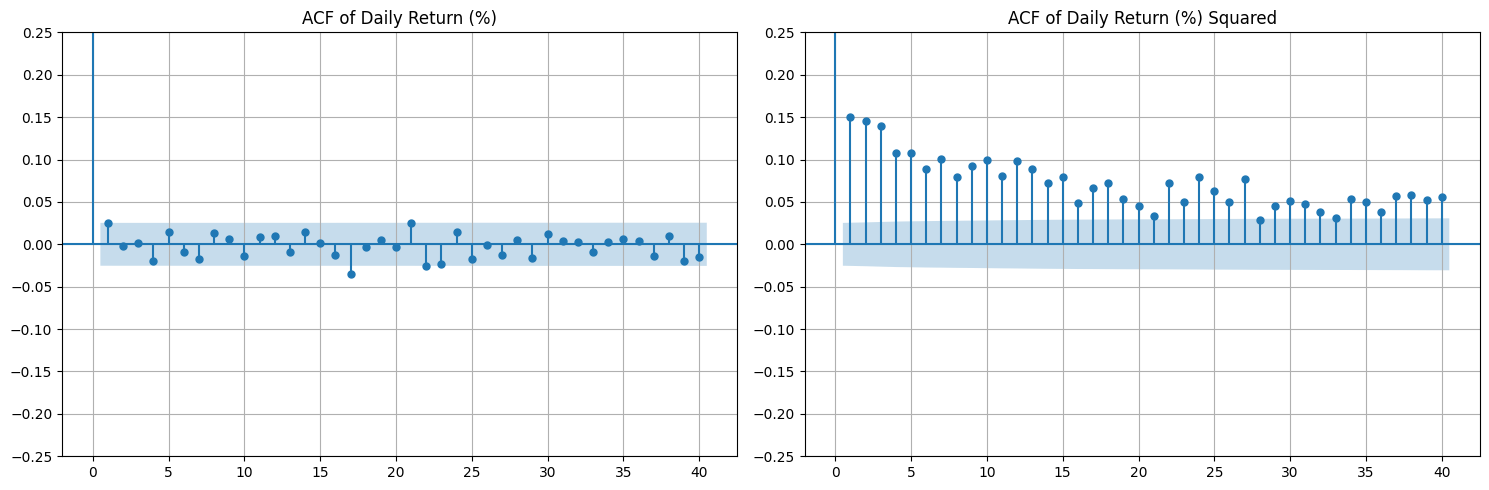

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot in the first subplot
plot_acf(us_daily[['Daily Change (%)']], ax=axs[0], title='ACF of Daily Return (%)', lags=no_of_lags)
axs[0].set_ylim(-0.25, 0.25)
axs[0].grid(True)
axs[0].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the second subplot
plot_acf(us_daily[['Daily Change (%) Squared']], ax=axs[1], title='ACF of Daily Return (%) Squared', lags=no_of_lags)
axs[1].set_ylim(-0.25, 0.25)
axs[1].grid(True)
axs[1].set_yticks(np.arange(-0.25, 0.3, 0.05))

plt.tight_layout()
plt.show()

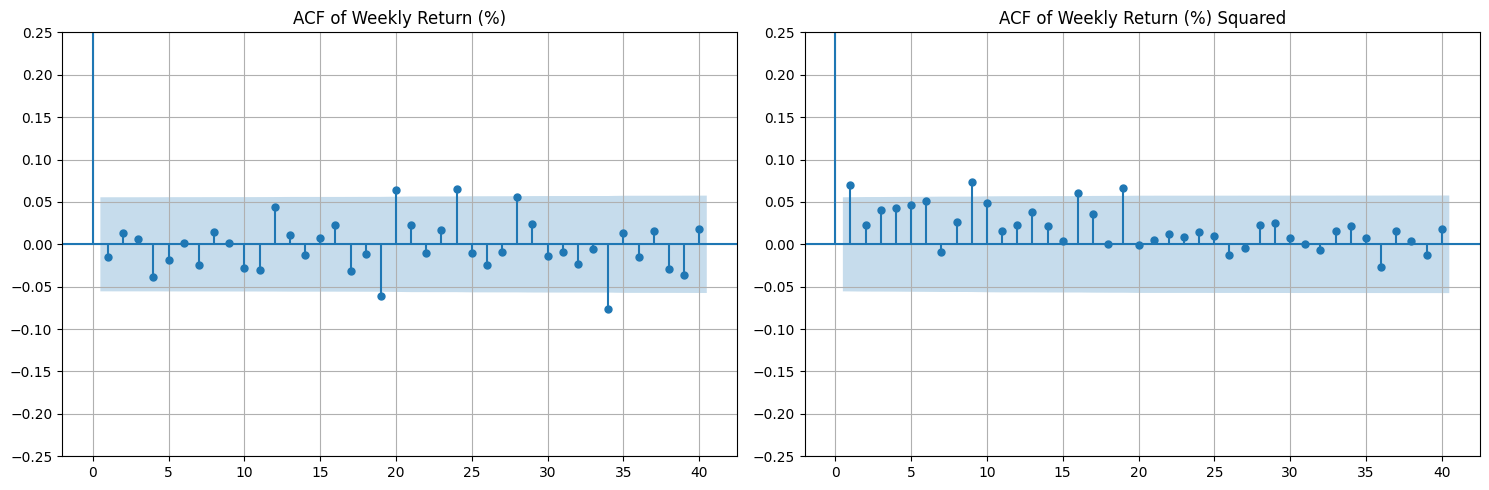

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the first subplot
plot_acf(us_weekly[['Weekly Change (%)']], ax=axs[0], title='ACF of Weekly Return (%)', lags=no_of_lags)
axs[0].set_ylim(-0.25, 0.25)
axs[0].grid(True)
axs[0].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the second subplot
plot_acf(us_weekly[['Weekly Change (%) Squared']], ax=axs[1], title='ACF of Weekly Return (%) Squared', lags=no_of_lags)
axs[1].set_ylim(-0.25, 0.25)
axs[1].grid(True)
axs[1].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Display the plots
plt.tight_layout()
#plt.grid(True)
plt.show()

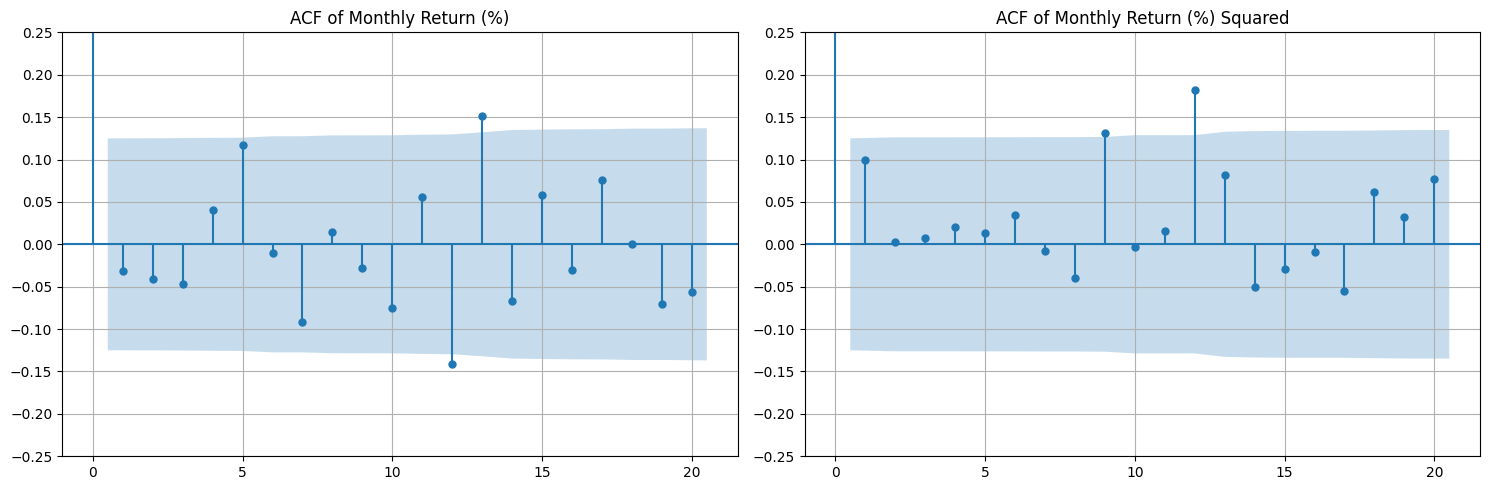

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot in the first subplot
plot_acf(us_monthly[['Monthly Change (%)']], ax=axs[0], title='ACF of Monthly Return (%)', lags=20)
axs[0].set_ylim(-0.25, 0.25)
axs[0].grid(True)
axs[0].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the second subplot
plot_acf(us_monthly[['Monthly Change (%) Squared']], ax=axs[1], title='ACF of Monthly Return (%) Squared', lags=20)
axs[1].set_ylim(-0.25, 0.25)
axs[1].grid(True)
axs[1].set_yticks(np.arange(-0.25, 0.3, 0.05))
# Display the plots
plt.tight_layout()
plt.show()

### Partial Auto Correlation

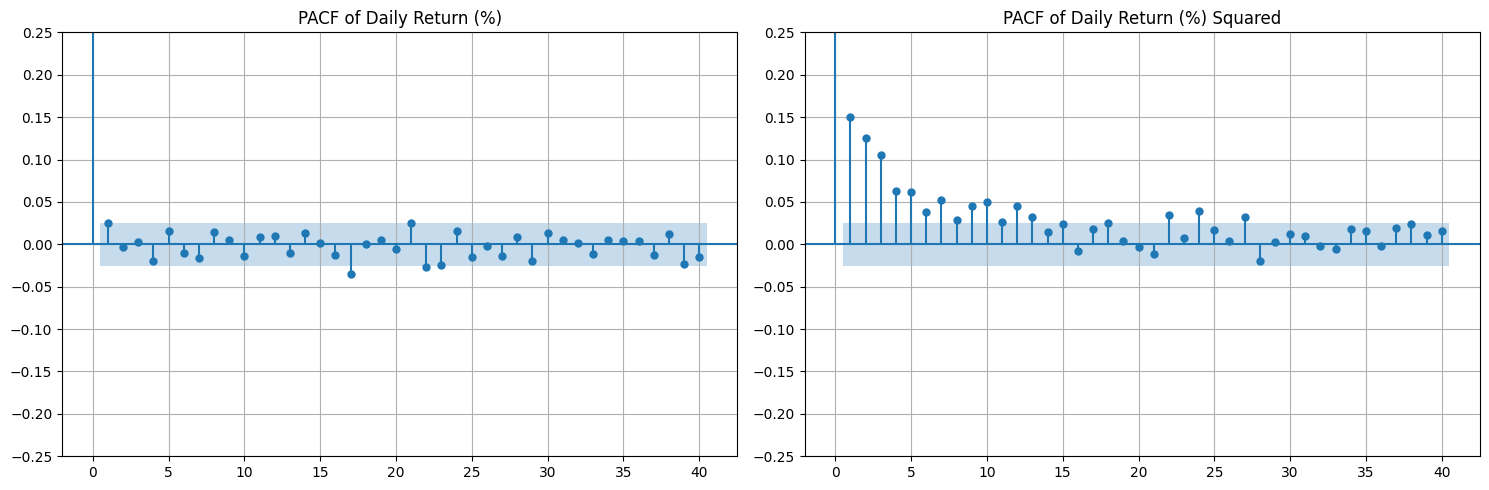

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot in the first subplot
plot_pacf(us_daily[['Daily Change (%)']], ax=axs[0], title='PACF of Daily Return (%)', lags=no_of_lags)
axs[0].set_ylim(-0.25, 0.25)
axs[0].grid(True)
axs[0].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the second subplot
plot_pacf(us_daily[['Daily Change (%) Squared']], ax=axs[1], title='PACF of Daily Return (%) Squared', lags=no_of_lags)
axs[1].set_ylim(-0.25, 0.25)
axs[1].grid(True)
axs[1].set_yticks(np.arange(-0.25, 0.3, 0.05))

plt.tight_layout()
plt.show()

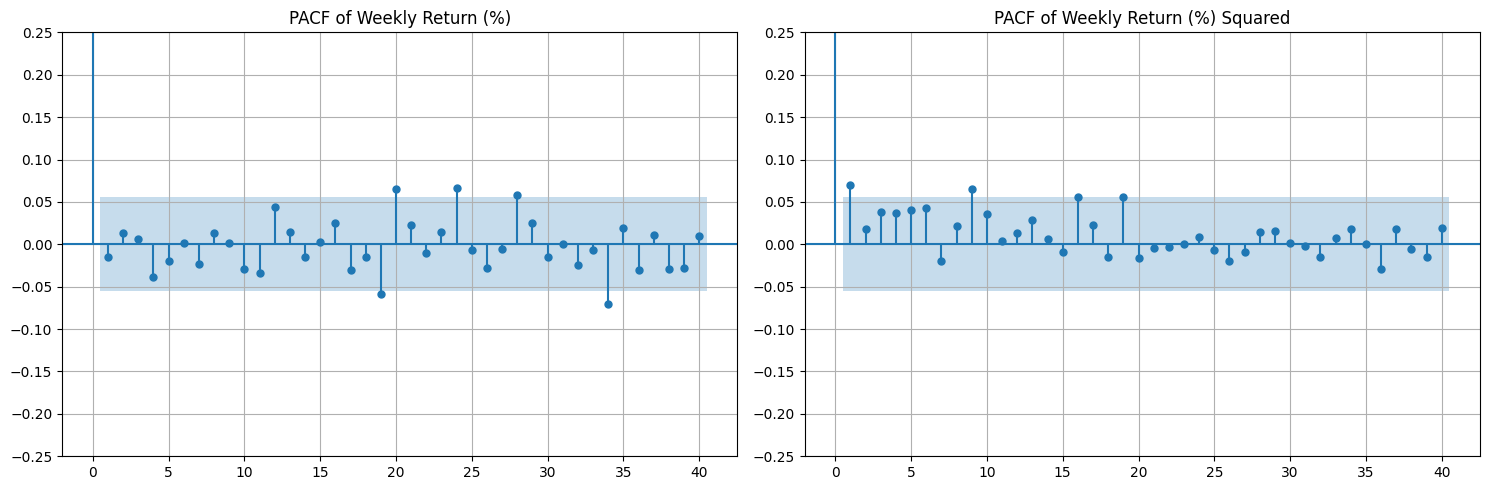

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the first subplot
plot_pacf(us_weekly[['Weekly Change (%)']], ax=axs[0], title='PACF of Weekly Return (%)', lags=no_of_lags)
axs[0].set_ylim(-0.25, 0.25)
axs[0].grid(True)
axs[0].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the second subplot
plot_pacf(us_weekly[['Weekly Change (%) Squared']], ax=axs[1], title='PACF of Weekly Return (%) Squared', lags=no_of_lags)
axs[1].set_ylim(-0.25, 0.25)
axs[1].grid(True)
axs[1].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Display the plots
plt.tight_layout()
#plt.grid(True)
plt.show()

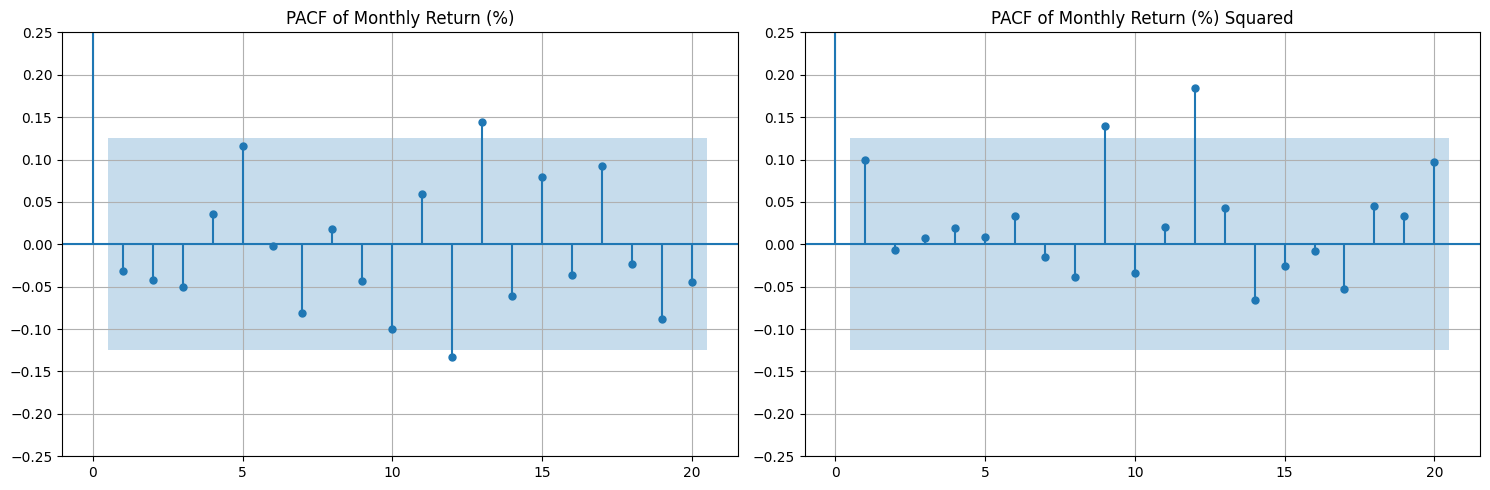

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot in the first subplot
plot_pacf(us_monthly[['Monthly Change (%)']], ax=axs[0], title='PACF of Monthly Return (%)', lags=20)
axs[0].set_ylim(-0.25, 0.25)
axs[0].grid(True)
axs[0].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the second subplot
plot_pacf(us_monthly[['Monthly Change (%) Squared']], ax=axs[1], title='PACF of Monthly Return (%) Squared', lags=20)
axs[1].set_ylim(-0.25, 0.25)
axs[1].grid(True)
axs[1].set_yticks(np.arange(-0.25, 0.3, 0.05))
# Display the plots
plt.tight_layout()
plt.show()